In [1]:
import numpy as np
import pandas as pd
import folium
import webbrowser
from folium.plugins import HeatMap

In [2]:
# 读取csv文件,以Dataframe形式保存

df=pd.read_csv(r"wuhan.csv")

num=df.shape[0]
print(num)

67


In [3]:
df.head()

,1,Province/State,Country/Region,Lat,Long,Confirmed
0,2,Anhui,Mainland China,31.82571,117.2264,591
1,3,Beijing,Mainland China,40.18238,116.4142,274
2,4,Chongqing,Mainland China,30.05718,107.8740,400
3,5,Fujian,Mainland China,26.07783,117.9895,215
4,6,Gansu,Mainland China,36.06110,103.8343,62


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
df2=df[['Country/Region','Confirmed']]
df3=df2.groupby(['Country/Region']).sum().sort_values(by=['Confirmed'], ascending=False)
print(df3)

                      Confirmed
Country/Region                 
Mainland China            28088
Japan                        45
Singapore                    28
Thailand                     25
Hong Kong                    24
South Korea                  23
Taiwan                       16
Australia                    14
US                           12
Germany                      12
Malaysia                     12
Vietnam                      10
Macau                        10
France                        6
Canada                        5
United Arab Emirates          5
India                         3
Italy                         2
Philippines                   2
Russia                        2
UK                            2
Belgium                       1
Spain                         1
Sri Lanka                     1
Sweden                        1
Finland                       1
Cambodia                      1
Nepal                         1


Text(0, 0.5, 'Confirmed')

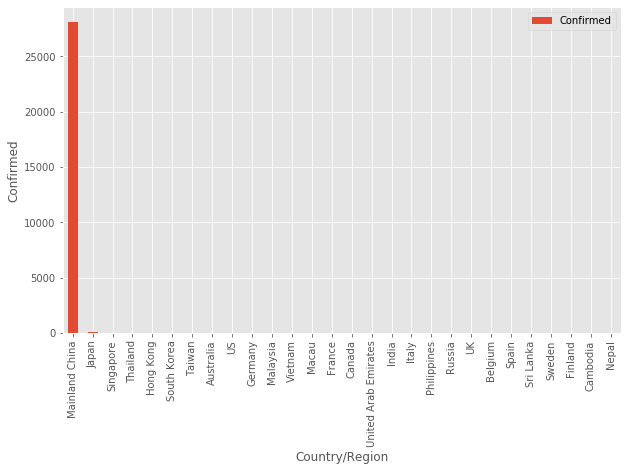

In [5]:
fig=plt.style.use('ggplot')
df3.plot(kind='bar',figsize=(10,6))
plt.ylabel('Confirmed')

In [6]:
# 获取纬度

lat=np.array(df["Lat"][0:num])
# 获取经度
lon =np.array(df["Long"][0:num])
# 获取PM2.5，转化为numpy浮点型

pm25=np.array(df["Confirmed"][0:num],dtype=float)
# 将数据制作成[lats, lons, weights]的形式

data1=[[lat[i],lon[i],pm25[i]] for i in range(num)]
# 绘制Map，中心经纬度[32, 120],开始缩放程度是5倍

map=folium.Map(location=[32,120], zoom_start=5)
# 将热力图添加到前面建立的map里

HeatMap(data1).add_to(map)
 

#file_path=r"wuhan.html"

# 保存为html文件

#map.save(file_path)
# 默认浏览器打开

map

In [7]:
# In this example, with the hep of heat maps, we are able to perceive the density of volcanoes
from folium import plugins

df=pd.read_csv(r"wuhan.csv")
# 获取数据个数

num=df.shape[0]
# 获取纬度

lat=np.array(df["Lat"][0:num])
# 获取经度
lon =np.array(df["Long"][0:num])
# 获取PM2.5，转化为numpy浮点型

confirmed=np.array(df["Confirmed"][0:num],dtype=float)

data1=[[lat[i],lon[i],confirmed[i]] for i in range(num)]
# 将数据制作成[lats, lons, weights]的形式
map = folium.Map(location = [32,120], tiles='Cartodb dark_matter', zoom_start = 5)


data1

HeatMap(data1).add_to(map)
 
map